## STATS AND EDA MINI PROJECT 

### Goals
1. Using the core statistical theoretical concepts and knowledge to solve real time problem
statements.
2. Visualize a real time industry scenario where one can use these statistical concepts.
3. Detailed data analysis and number crunching using statistics
4. Exhaustive report building using EDA and visualization techniques to help the business
take decisions using insights from the data

# Part A Statistics:

### The following are the ages of 30 customers who ordered an EV scooter from Zen
Automotives.ee.
42 44 62 35 20
30 56 20 23 41
55 22 31 27 66
21 18 24 42 25
32 50 31 26 36
39 40 18 36 22


In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import statistics
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"]=(15,7)

#### Q1. Compute the mean, median and the mode of the data?

In [388]:
ages=[42,44,62,35,20,30,56,20,23,41,55,22,31,27,66,21,18,24,42,25,32,50,31,26,36,39,40,18,36,22 ]
len(ages)

30

In [389]:
df=pd.DataFrame(ages)

In [390]:
avg=np.mean(ages)
print('mean of the given data is :',avg)

mean of the given data is : 34.46666666666667


In [391]:
med=np.median(ages)
print('median of the given data is :',med)

median of the given data is : 31.5


In [490]:
mod=statistics.mode(ages)
print('Mode of the data is :',mod)

Mode of the data is : 42


#### The mean, median and mode of the data are 34.46666666666667, 31.5, 42 respectively. Also this is a multimodal variable. 

#### Q2. Compute the range , variance and standard deviation of customer ages


In [393]:
mx=max(ages)
mn=min(ages)
rnge=mx-mn
print('Range of this data is :',rnge)

Range of this data is : 48


In [394]:
var=np.var(ages)
print('variance of data is :',var)

variance of data is : 171.4488888888889


In [395]:
s_d=np.std(ages)
print('Standard Deviation',s_d)

Standard Deviation 13.093849277003645


#### Q3. Find the mean deviation for the data . The mean deviation is defined as below.


In [396]:
mean_deviation= (sum(abs(ages-avg)))/len(ages)

In [397]:
mean_deviation

10.764444444444443

#### Q4. Calculate the Pearson coefficient of skewness and comment on the Skewness of the data. 
* [A measure to determine the skewness of a distribution is called the Pearson coefficient of skewness. The formula is The value of the coefficient if skewness usually ranges from –3 to 3. When the distribution is symmetric, the coefficient is zero; when the distribution is positively skewed , the coefficient is positive, and when the distribution is
negatively skewed the coefficient is negative.]


In [398]:
a=3*(avg-med)
print('Pearson coefficient of skewness is :',a/s_d)

Pearson coefficient of skewness is : 0.6797084502592238


##### The distribution of the data seems to be positively skewed

#### Q5. Count the number of data values that fall within two standard deviations of the mean. Compare this with the answer from Chebyshev’s Theorem.

In [399]:
ser=pd.Series([42,44,62,35,20,30,56,20,23,41,55,22,31,27,66,21,18,24,42,25,32,50,31,26,36,39,40,18,36,22])

In [499]:
av=ser.mean()
st=ser.std()


44

In [504]:
num=ser-av
denom=st
z_score=num/denom
listt=[]
for k in z_score:
    if ((k<-2) or (k>2)):
        listt.append(k)
     

In [508]:
print(listt)
len(listt)
num_of_values=len(ser)-len(listt)
num_of_values

[2.0674253005008034, 2.3677776443992253]


28

#### Q6. Find the three quartiles and the interquartile range (IQR).


In [400]:
df.describe()

,0
count,30.000000
mean,34.466667
std,13.317692
min,18.000000
25%,23.250000
50%,31.500000
75%,41.750000
max,66.000000


In [401]:
#IQR - 
q1=23.250000
q3=41.750000
iqr=q3-q1
print('IQR of the data is :',iqr)
#25% value is 23.250000
#50% value is 31.500000
#75% value is 41.750000

IQR of the data is : 18.5


#### Q7. Are there any outliers in the data set ?

In [402]:
up_lim=q3+1.5*iqr
lo_lim=q1-1.5*iqr
print(up_lim)
print(lo_lim)

69.5
-4.5


In [403]:
outliers=df[((df>up_lim)|(df<lo_lim)).any(axis=1)]
len(outliers)

0

There are no outliers

#### Q8. Draw a boxplot of the dataset to confirm .

<AxesSubplot:xlabel='0'>

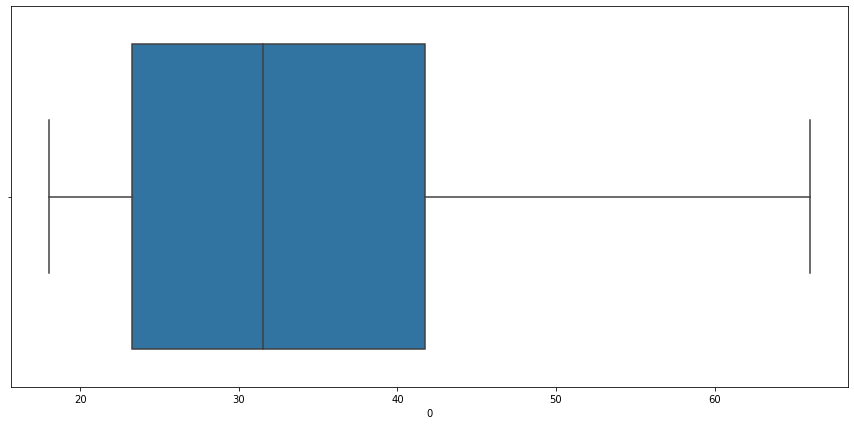

In [404]:
sns.boxplot(df[0])

#### Q9. Find the percentile rank of the datapoint 50.


In [405]:
df=pd.DataFrame(ser)
df
df['p_rank']=df[0].rank(pct=True)

In [406]:
df[df[0]==50]

,0,p_rank
21,50,0.866667


Percentile rank of the datapoint 50 is 0.866667

####  Q10. What is the probability that a person ordering an EV scooter is above 50 years old?

In [407]:
sample=np.array([42,44,62,35,20,30,56,20,23,41,55,22,31,27,66,21,18,24,42,25,32,50,31,26,36,39,40,18,36,22 ])


In [408]:
stats.norm.sf(4, loc=np.mean(sample), scale=sample.std(ddof=1))

0.9889220257853062

#### Q11. Create a frequency distribution for the data and visualize it appropriately


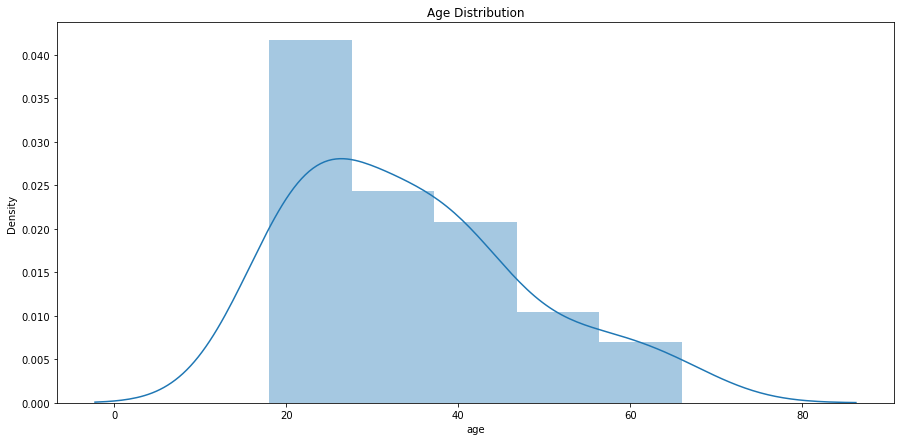

In [409]:
sns.distplot(df[0])
plt.title('Age Distribution')
plt.xlabel('age')
plt.show()

#### Q12. Create a probability distribution of the data and visualize it appropriately

<AxesSubplot:xlabel='0', ylabel='Density'>

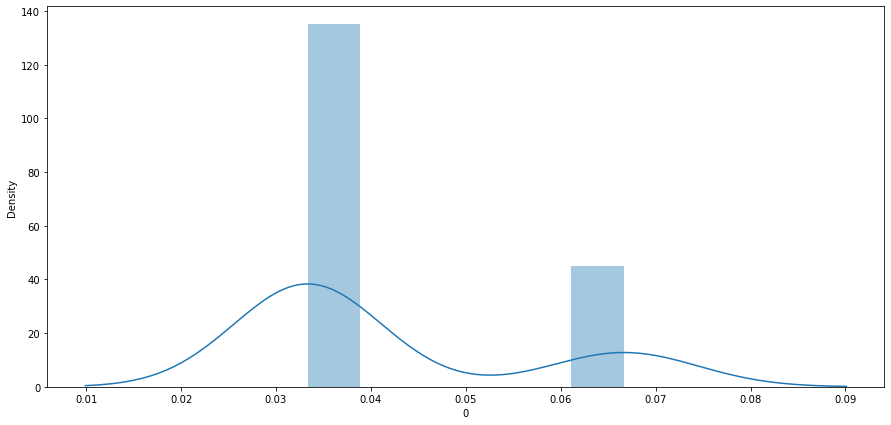

In [410]:
sns.distplot(df[0].value_counts(normalize=True))

#### Q13. What is the shape of the distribution of this dataset? Create an appropriate graph to determine that. Take 100 random samples with replacement from this dataset of size 5 each. Create a sampling distribution of the mean age of customers. Compare with other sampling distributions of sample size 10, 15, 20, 25, 30. State your observations. Does it corroborate the Central Limit Theorem?

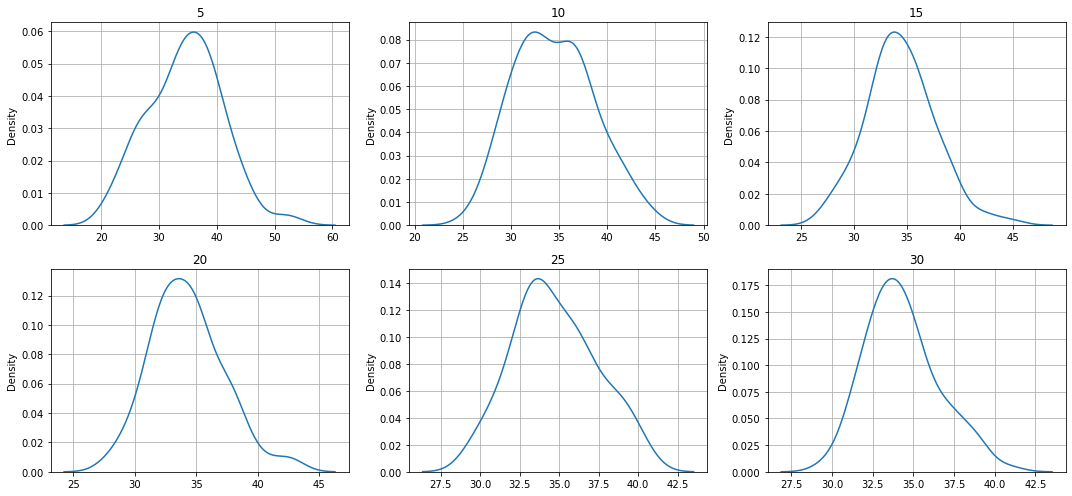

In [411]:
import random
sample_sizes=[5,10,15,20,25,30]
r=2
col=3
it=1
for i in sample_sizes:
    lst=[]
    for j in range (1,101):
           
            a=random.choices(ages,k=i)
            lst.append(sum(a)/len(a))
    plt.subplot(r,col,it)         
    sns.distplot(lst,hist=False)
    plt.title(i)
    plt.grid()
    it+=1
plt.tight_layout()
plt.show()

#### Q14. Treat this dataset as a binomial distribution where p is the probability that a person ordering an EV is above 50 years age. What is the probability that out of a random sample of 10 buyers exactly 6 are above 50 years of age?

In [412]:
stats.binom.pmf(6,10,0.6)

0.2508226559999998

#### Q15. A study claims that 10% of all customers for an EV scooter are above 50 years of age. Using the Normal approximation of a Binomial distribution, find the probability that in a random sample of 300 prospective customers exactly 25 will be above 50 years of age.
* [ Note that the normal distribution can be used to approximate a binomial
distribution if np>=5 and nq>=5 with the following correction for continuity
P(X=z) = P(z-0.5 < X < z+0.5 ) ]

In [413]:
stats.binom.pmf(k=25,n=300,p=0.1)

0.0509860415314796

#### Q16. Compute a 95% Confidence Interval for the true mean age of the population of EV scooter buyers for the dataset using appropriate distribution.(State reasons as to why did you use a z or t distribution)

In [414]:
c=0.95
alpha=1-c
z=stats.norm.isf(alpha/2)
z

1.959963984540054

In [415]:
up_lim=avg+z*(s_d/np.sqrt(30))
lo_lim=avg-z*(s_d/np.sqrt(30))


In [416]:
print('upper limit:',up_lim,'lower limit:',lo_lim)

upper limit: 39.15215435569268 lower limit: 29.781178977640657


In [417]:
### We have used z distribution since the size of the sample size is 30.

#### Q17. A data scientist wants to estimate with 95% confidence the proportion of people who own an EV in the population. A recent study showed that 20% of people interviewed had an EV. The data scientist wants to be accurate within 2% of the true proportion. Find the minimum sample size necessary.

In [58]:
c=0.95
alpha=1-c
z=stats.norm.isf(alpha/2)
z
round(np.square(z/0.02)*((0.2)*(1-0.2)))

1537

#### Q18. The same data scientist wants to estimate the proportion of executives who own an EV. She wants to be 90% confident and accurate within 5% of true proportion. Find the minimum sample size necessary.


In [420]:
z_s=stats.norm.isf(0.05)

In [421]:
np.square(z_s/0.05)*((0.2)*(1-0.2))

173.15478106210657

#### Q19. A researcher claims that currently 20% of the population are owning EVs. Test his claim with an alpha =0.05 if out of a random sample of 30 two-wheeler owners only 5 own an EV.

In [422]:
#H0:p=0.20
#Ha:p<>0.20
# its a two tail test
alpha=0.05
n=30
c=1-alpha
z_crit=stats.norm.isf(alpha/2)
z_stat=avg-0.20/(s_d/np.sqrt(n))
print(z_crit)
print(z_stat)

1.9599639845400545
34.383005621557935


#### Q20. Assume you are working for a Consumer Protection Agency that looks at
complaints raised by customers for the transportation industry. Say you have
been receiving complaints about the mileage of the latest EV launched by the
Zen Automotives. Zen allows you to test randomly 40 of its new EVs to test
mileage. Zen claims that the new EVs get a mileage of 96 kmpl on the
highway. Your results show a mean of 91.3 kmpl and a standard deviation of
14.4.
a. Show why you support Zen’s claim using the P-value obtained.
b. After more complaints you decide to test the variability of the mileage on
the highway. On questioning Zen’s quality control engineer , you find
that they are claiming a standard deviation of 7.2. Test the claim about
the standard deviation. [Hint :use the Chi-square test for
variance/standard deviation]
c. Write a summary of results and the action that Zen must take to remedy
the complaints.
d. What is your position on performing the test for variability along with the
test for means?

In [ ]:
n=40
av=91.3
st=14.4
alpha=0.05
c=1-alpha

In [ ]:
#1 state the hypothesis 
#mu=96 & mu<>96

In [ ]:
#Decision Criteria
#this is a 2 tail z test


In [509]:
#z critical
z_crit=stats.norm.isf(alpha/2)
z_crit

1.9599639845400545

In [512]:
#z statical
num=av-96
denom=st/np.sqrt(n)
z_stat=num/denom


In [513]:
print('z_statical:',z_stat)
print('z_critical:',z_crit)

z_statical: -25.307083816392623
z_critical: 1.9599639845400545


In [523]:
#pvalue
pval=stats.norm.cdf(z_stat)*2
print(pval)

2.6693137262057116e-141


pvalue is less than alpha so we are rejecting the null hypothesis.

In [519]:
n=40
alpha=0.05
c=1-c
st=14.4

In [520]:
#1 state the hypothesis
#mu=7.2 & mu<>7.2

In [521]:
#2 Decision criteria
#right tail chisquare test .

In [530]:
#chi_critical
chi_crit=stats.chi2.isf(0.05,df=n-1)


In [535]:
#chi_statical
num=(n-1)*(7.2**2)
denom=st**2
chi_stat=num/denom

chi_stat

11.399128992119458

In [538]:
pval=stats.chi2.sf(chi_stat,df=n-1)
pval*2

1.999990657453969

pvalue>alpha so we fail to accept the null hypothesis.

*The claim of Zen is proven wrong in the first hypothesis test that the new EVs get a mileage of 96 kmpl on the highway.
*Our claim is proven right that the mu is equals to 7.2

#### Q21. Write a report comparing and contrasting Descriptive vs Inferential Statistics in about 200-500 words and how each helps to get more insight into the data at hand.


* Descriptive analytics is the process of analysing historical data to better understand the changes that have occurred in a business. Descriptive analytics can help to identify the areas of strength and weakness in an organization. Examples of metrics used in descriptive analytics include year-over-year pricing changes, month-over-month sales growth, the number of users, or the total revenue per subscriber.
* In its simplest form, descriptive analytics answers the question, "What happened?" Descriptive analytics uses central tendencies, distribution of the data and measure of dispersions to answer "What happened?"

* On the  other hand, the goal of inferential analytics is to provide measurements that can describe the overall population of a research project by studying a smaller sample of it. Inferential statistics enables one to make descriptions of data and draw inferences and conclusions from the respective data.

* In the above solved questions, question 1 to 13 relates to descriptive analysis and in the rest, we are employing inferential statistics to draw conclusions. 


# Part B Exploratory Data Analysis:

* DOMAIN: Sports
* CONTEXT: Company X manages the men's top professional basketball division of the American league system.The dataset contains information on all the teams that have participated in all the past tournaments. It has data about how many baskets each team scored, conceded, how many times they came within the first 2 positions,how many tournaments they have qualified, their best position in the past, etc.

DATA DESCRIPTION: Basketball.csv - The data set contains information on all
the teams so far participated in all the past tournaments.
• ATTRIBUTE INFORMATION:
1. Team: Team’s name
2. Tournament: Number of played tournaments.
3. Score: Team’s score so far.
4. PlayedGames: Games played by the team so far.
5. WonGames: Games won by the team so far.
6. DrawnGames: Games drawn by the team so far.
7. LostGames: Games lost by the team so far.
8. BasketScored: Basket scored by the team so far.
9. BasketGiven: Basket scored against the team so far.
10. TournamentChampion: How many times the team was a champion of the
tournaments so far.
11. Runner-up: How many times the team was a runners-up of the tournaments
so far.
12. TeamLaunch: Year the team was launched on professional basketball.
13. HighestPositionHeld: Highest position held by the team amongst all the
tournaments played.

PROJECT OBJECTIVE: 
* Company’s management wants to invest on proposals on managing some of the best teams in the league. The analytics department has been assigned with a task of creating a report on the performance shown by 6 the teams. Some of the older teams are already in contract with competitors. Hence Company X wants to understand which teams they can approach which will be a deal win for them.

In [423]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [424]:
from sklearn.model_selection import train_test_split

#### Q1. Read the data set, clean the data and prepare a final dataset to be used for analysis.

In [425]:
# Read the data
df=pd.read_csv('Basketball.csv')
df.head(3)

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1


In [426]:
#Checking the number of rows and columns in the data. 
df.shape

(61, 13)

There are 61 records and 13 features.

In [427]:
# Checking the datatypes.
df.dtypes

Team                   object
Tournament              int64
Score                  object
PlayedGames            object
WonGames               object
DrawnGames             object
LostGames              object
BasketScored           object
BasketGiven            object
TournamentChampion     object
Runner-up              object
TeamLaunch             object
HighestPositionHeld     int64
dtype: object

In [428]:
# Checking the duplicate values in the data. 
df[df.duplicated()]

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld


In [429]:
df.duplicated().sum()

0

* There is no duplicate record in the Data set.

In [430]:
###The 5 point summary of the Data.
df.describe(include=np.number)

,Tournament,HighestPositionHeld
count,61.000000,61.000000
mean,24.000000,7.081967
std,26.827225,5.276663
min,1.000000,1.000000
25%,4.000000,3.000000
50%,12.000000,6.000000
75%,38.000000,10.000000
max,86.000000,20.000000


### Inferences of the five point summary of the Data.
* standard deviation of Tournament & HighestPositionHeld.
* First / Second/ Third Quantile.
* Max and Min value if the data.

In [431]:
##Understanding the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                61 non-null     object
 3   PlayedGames          61 non-null     object
 4   WonGames             61 non-null     object
 5   DrawnGames           61 non-null     object
 6   LostGames            61 non-null     object
 7   BasketScored         61 non-null     object
 8   BasketGiven          61 non-null     object
 9   TournamentChampion   61 non-null     object
 10  Runner-up            61 non-null     object
 11  TeamLaunch           61 non-null     object
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.3+ KB


In [432]:
#Checking for the null values in the data.
df.isnull().sum()

Team                   0
Tournament             0
Score                  0
PlayedGames            0
WonGames               0
DrawnGames             0
LostGames              0
BasketScored           0
BasketGiven            0
TournamentChampion     0
Runner-up              0
TeamLaunch             0
HighestPositionHeld    0
dtype: int64

* There are no null values in the data.

In [433]:
#Pre-processing of the data. 
df['TeamLaunch'].unique()

array(['1929', '1931to32', '1934-35', '1939-40', '1932-33', '1941to42',
       '1948-49', '1944_45', '1935-36', '1949_50', '1933to34', '1960-61',
       '1951-52', '1998-99', '1941-42', '1977-78', '1959-60', '2004to05',
       '1961-62', '1940-41', '1930-31', '1963-64', '1974-75', '1943-44',
       '1987-88', '1991_92', '2007-08', '1962-63', '1994-95', '1978-79',
       '1971-72', '1999to00', '2014-15', '1990-91', '1947-48', '1996-97',
       '1995-96', '1945-46', '1953-54', '1979-80', '1950-51', '2016_17',
       '2009-10', '1956-57', '1951~52', '1955-56', '2017~18'],
      dtype=object)

In [434]:
#df['TeamLaunch'].strip()
df['Strip']=df['TeamLaunch'].apply(lambda x:x.strip())
df['Strip']=df['Strip'].apply(lambda x: x[0:4])

In [435]:
df['Strip'].unique()

array(['1929', '1931', '1934', '1939', '1932', '1941', '1948', '1944',
       '1935', '1949', '1933', '1960', '1951', '1998', '1977', '1959',
       '2004', '1961', '1940', '1930', '1963', '1974', '1943', '1987',
       '1991', '2007', '1962', '1994', '1978', '1971', '1999', '2014',
       '1990', '1947', '1996', '1995', '1945', '1953', '1979', '1950',
       '2016', '2009', '1956', '1955', '2017'], dtype=object)

In [436]:
df.tail()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,Strip
56,Team 57,1,34,38,8,10,20,38,66,-,-,2009-10,20,2009
57,Team 58,1,22,30,7,8,15,37,57,-,-,1956-57,16,1956
58,Team 59,1,19,30,7,5,18,51,85,-,-,1951~52,16,1951
59,Team 60,1,14,30,5,4,21,34,65,-,-,1955-56,15,1955
60,Team 61,1,-,-,-,-,-,-,-,-,-,2017~18,9,2017


In [437]:
df.drop(60,inplace=True)

Team 60 played 1 tournament and most of the its records are null ,we are dropping it.

In [438]:
df['TournamentChampion'].fillna('0',inplace=True)

In [439]:
df['Runner-up'].fillna('0',inplace=True)

In [440]:
df.isnull().sum()

Team                   0
Tournament             0
Score                  0
PlayedGames            0
WonGames               0
DrawnGames             0
LostGames              0
BasketScored           0
BasketGiven            0
TournamentChampion     0
Runner-up              0
TeamLaunch             0
HighestPositionHeld    0
Strip                  0
dtype: int64

In [441]:
df.replace('-',0,inplace=True)

In TournamentChampion & Runner-up most of the records are empty of thode teams who have not played the finals ever so we imputed thode with 0.

# Changing some of the features from object to integer

In [442]:
#Changing the data types. 
df['Total_score']=df['Score'].astype('int')
df['Total_Games']=df['PlayedGames'].astype('int')
df['Total_wins']=df['WonGames'].astype('int')
df['Total_draw']=df['DrawnGames'].astype('int')
df['Total_losses']=df['LostGames'].astype('int')
df['Total_basket_scored']=df['BasketScored'].astype('int')
df['Total_basket_given']=df['BasketGiven'].astype('int')
df['Total_tournament_win']=df['TournamentChampion'].astype('int')
df['Total_runnerups']=df['Runner-up'].astype('int')


In [443]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Team                  60 non-null     object
 1   Tournament            60 non-null     int64 
 2   Score                 60 non-null     object
 3   PlayedGames           60 non-null     object
 4   WonGames              60 non-null     object
 5   DrawnGames            60 non-null     object
 6   LostGames             60 non-null     object
 7   BasketScored          60 non-null     object
 8   BasketGiven           60 non-null     object
 9   TournamentChampion    60 non-null     object
 10  Runner-up             60 non-null     object
 11  TeamLaunch            60 non-null     object
 12  HighestPositionHeld   60 non-null     int64 
 13  Strip                 60 non-null     object
 14  Total_score           60 non-null     int32 
 15  Total_Games           60 non-null     int3

# Dropping columns:

In [444]:
df.drop(['Score','PlayedGames','WonGames','DrawnGames','LostGames','BasketScored','BasketGiven','TournamentChampion','Runner-up','TeamLaunch'],axis=1,inplace=True)

In [445]:
df['Team_launch_year']=df['Strip']

In [446]:
df.drop('Strip',axis=1,inplace=True)

Now we have a cleaned data to do analysis

# Outlier Treatment

In [447]:
q1=df.quantile(0.25) 
q3=df.quantile(0.75)
iqr=q3-q1
upper=q3+1.5*iqr
lower=q1-1.5*iqr

In [448]:
df[((df>upper)|(df<lower)).any(axis=1)]


,Team,Tournament,HighestPositionHeld,Total_score,Total_Games,Total_wins,Total_draw,Total_losses,Total_basket_scored,Total_basket_given,Total_tournament_win,Total_runnerups,Team_launch_year
0,Team 1,86,1,4385,2762,1647,552,563,5947,3140,33,23,1929
1,Team 2,86,1,4262,2762,1581,573,608,5900,3114,25,25,1929
2,Team 3,80,1,3442,2614,1241,598,775,4534,3309,10,8,1929
3,Team 4,82,1,3386,2664,1187,616,861,4398,3469,6,6,1931
4,Team 5,86,1,3368,2762,1209,633,920,4631,3700,8,7,1929
5,Team 6,73,1,2819,2408,990,531,887,3680,3373,1,4,1934
7,Team 8,70,1,2573,2302,864,577,861,3228,3230,2,3,1929
8,Team 9,58,2,2109,1986,698,522,766,2683,2847,0,1,1939
9,Team 10,51,1,1884,1728,606,440,682,2159,2492,1,0,1932
10,Team 11,45,1,1814,1530,563,392,575,2052,2188,1,5,1941


<AxesSubplot:xlabel='Total_wins'>

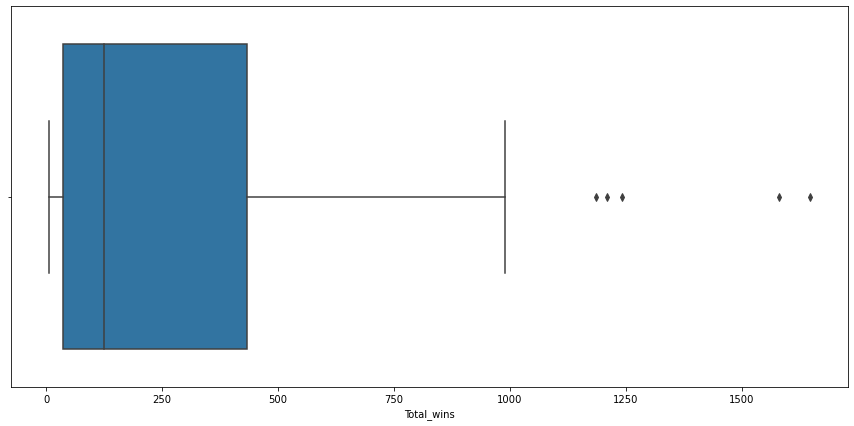

In [449]:
sns.boxplot(df['Total_wins'])

<AxesSubplot:xlabel='Tournament'>

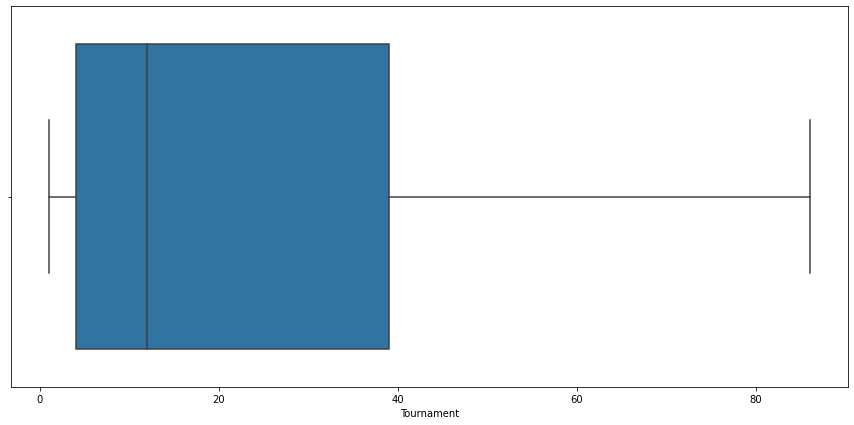

In [450]:
sns.boxplot(df['Tournament'])

<AxesSubplot:xlabel='Total_Games'>

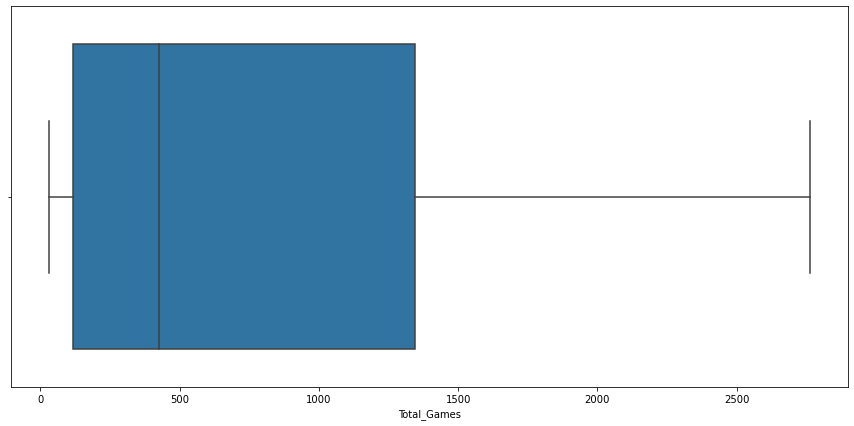

In [451]:
sns.boxplot(df['Total_Games'])

<AxesSubplot:xlabel='Total_score'>

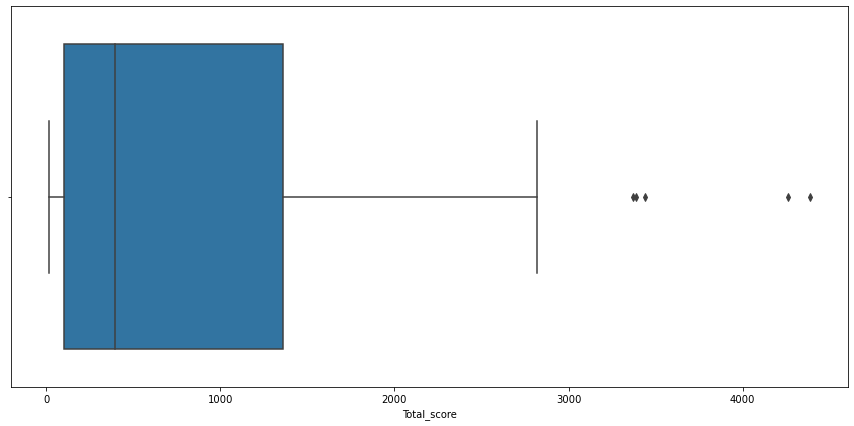

In [452]:
sns.boxplot(df['Total_score'])

<AxesSubplot:xlabel='Total_tournament_win'>

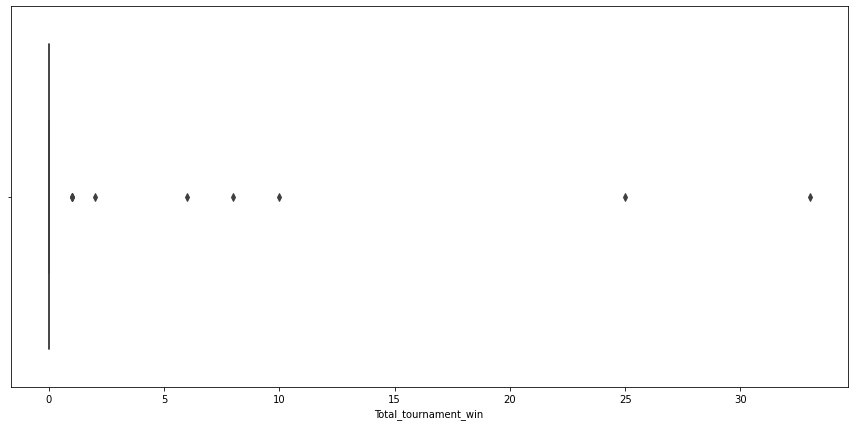

In [453]:
sns.boxplot(df['Total_tournament_win'])

<AxesSubplot:xlabel='Total_basket_scored'>

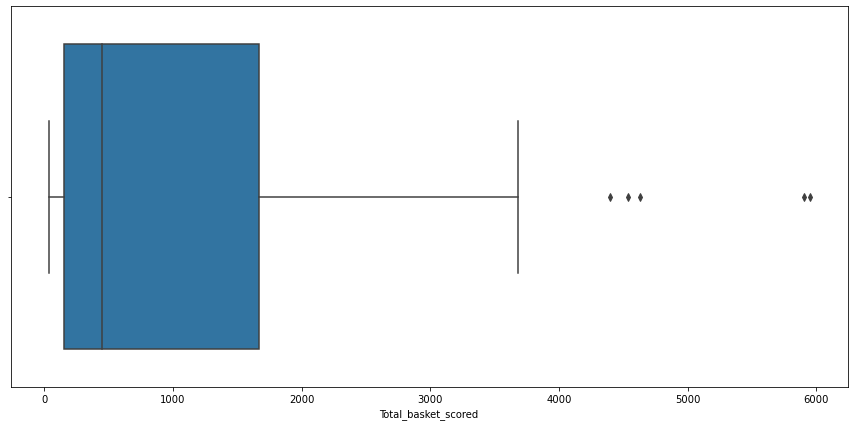

In [454]:
sns.boxplot(df['Total_basket_scored'])

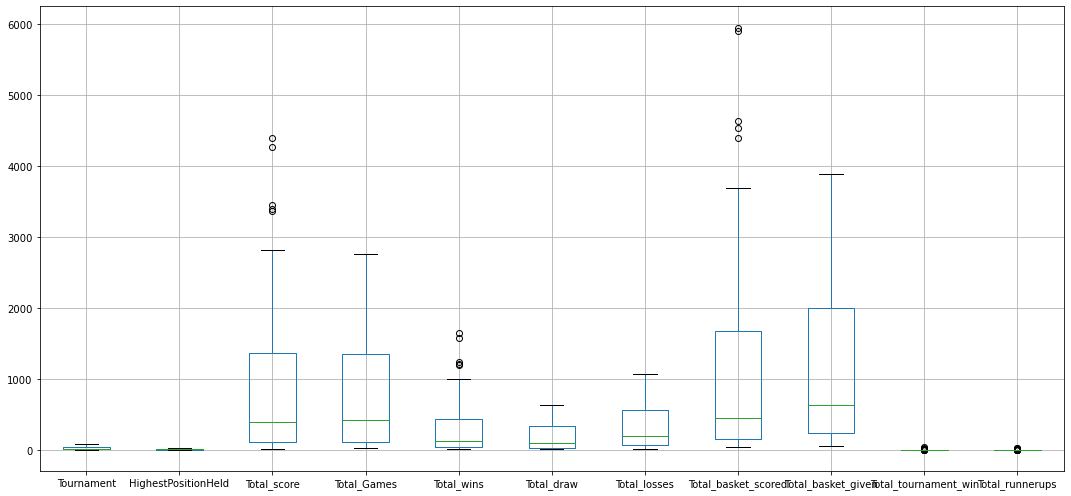

In [455]:
df.boxplot()
plt.tight_layout()

<AxesSubplot:xlabel='Total_draw'>

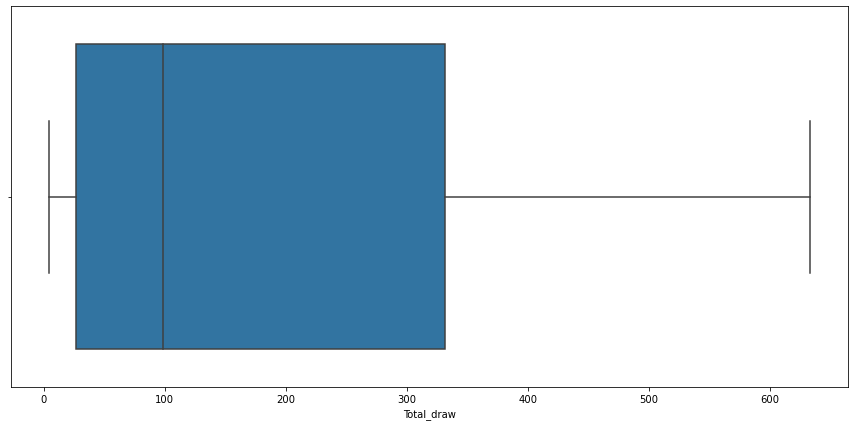

In [456]:
sns.boxplot(df['Total_draw'])

<AxesSubplot:xlabel='Total_losses'>

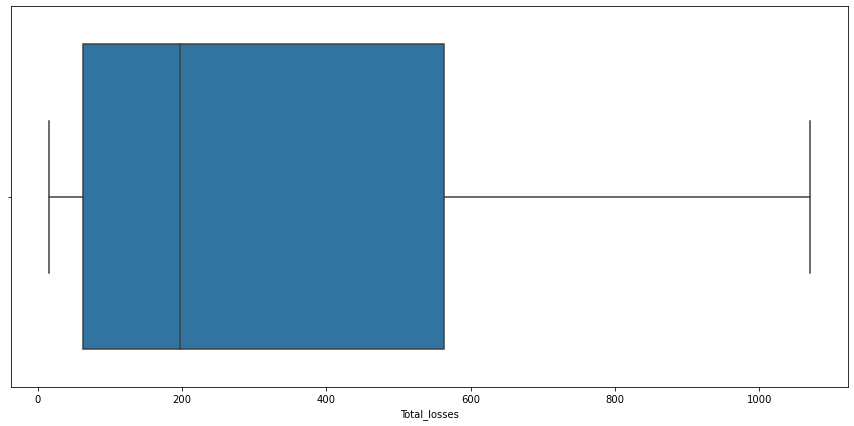

In [457]:
sns.boxplot(df['Total_losses'])

<AxesSubplot:xlabel='Total_runnerups'>

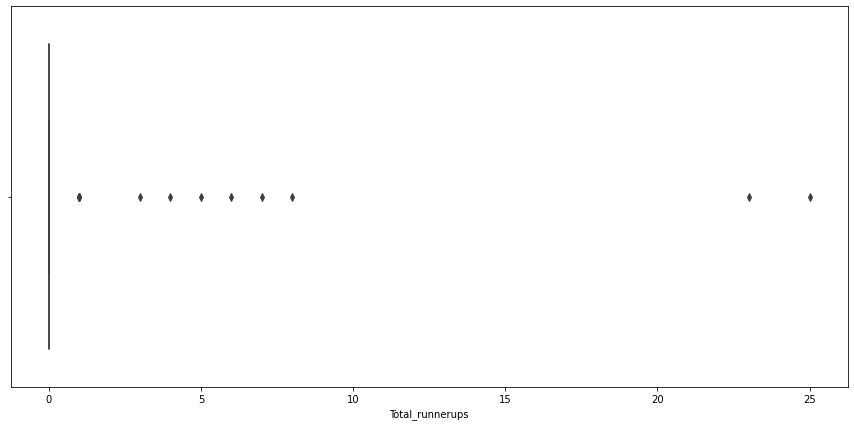

In [458]:
sns.boxplot(df['Total_runnerups'])

* We have outliers in 5 variables namely, total scores, total wins, total basket scored, total tournament win, total runer ups.
* We have decided not to treat outliers as these records are important for our analysis.

#### Q2. Perform detailed statistical analysis and EDA using univariate, bi-variate and multivariate EDA techniques to get data driven insights on recommending which teams they can approach which will be a deal win for them.. Also as a data and statistics expert you have to develop a detailed performance report using this data.

# Univariate Analysis

<AxesSubplot:xlabel='HighestPositionHeld', ylabel='Density'>

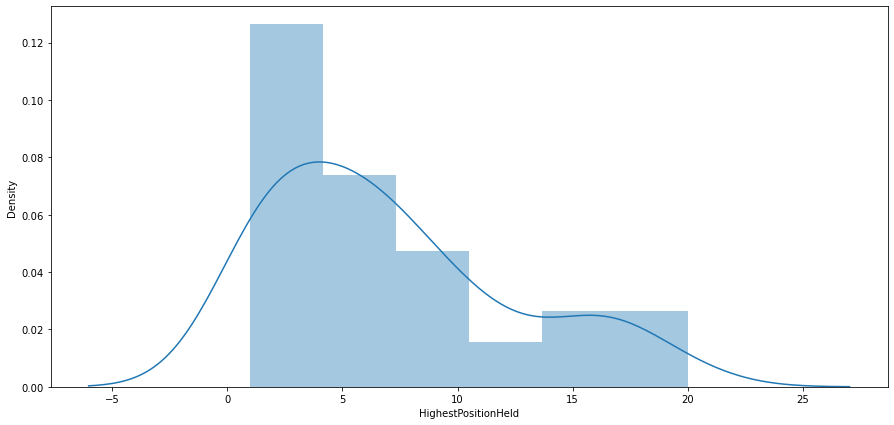

In [459]:
sns.distplot(df['HighestPositionHeld'])

There are few teams who ever topped the point table .

<AxesSubplot:xlabel='Total_score', ylabel='Density'>

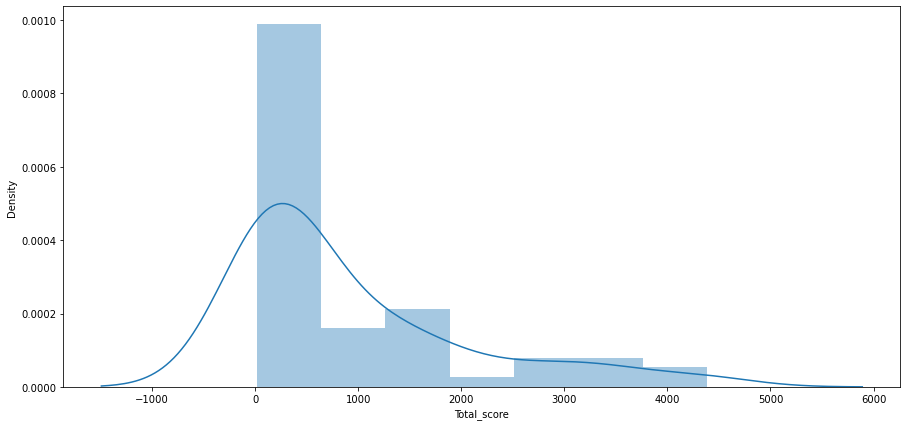

In [460]:
sns.distplot(df['Total_score'])

In [461]:
df['Total_score'].skew()

1.5741039730598263

The data is perfectly positive skewed

<AxesSubplot:xlabel='Total_Games', ylabel='Density'>

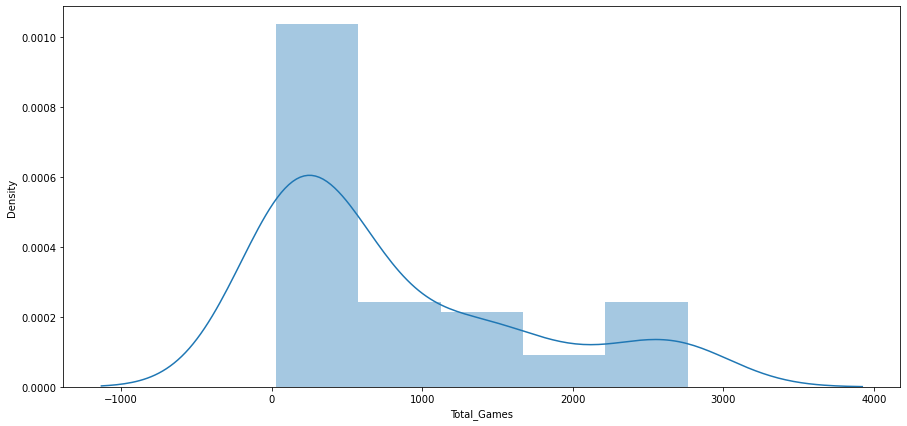

In [462]:
sns.distplot(df['Total_Games'])

There are many new teams in the data.

In [463]:
df.head()

,Team,Tournament,HighestPositionHeld,Total_score,Total_Games,Total_wins,Total_draw,Total_losses,Total_basket_scored,Total_basket_given,Total_tournament_win,Total_runnerups,Team_launch_year
0,Team 1,86,1,4385,2762,1647,552,563,5947,3140,33,23,1929
1,Team 2,86,1,4262,2762,1581,573,608,5900,3114,25,25,1929
2,Team 3,80,1,3442,2614,1241,598,775,4534,3309,10,8,1929
3,Team 4,82,1,3386,2664,1187,616,861,4398,3469,6,6,1931
4,Team 5,86,1,3368,2762,1209,633,920,4631,3700,8,7,1929


This Data shows that there are senior teams and a lot of new teams in the records so we can compare there records ,we switch to biavariate analusis.

# Bivariate Analysis

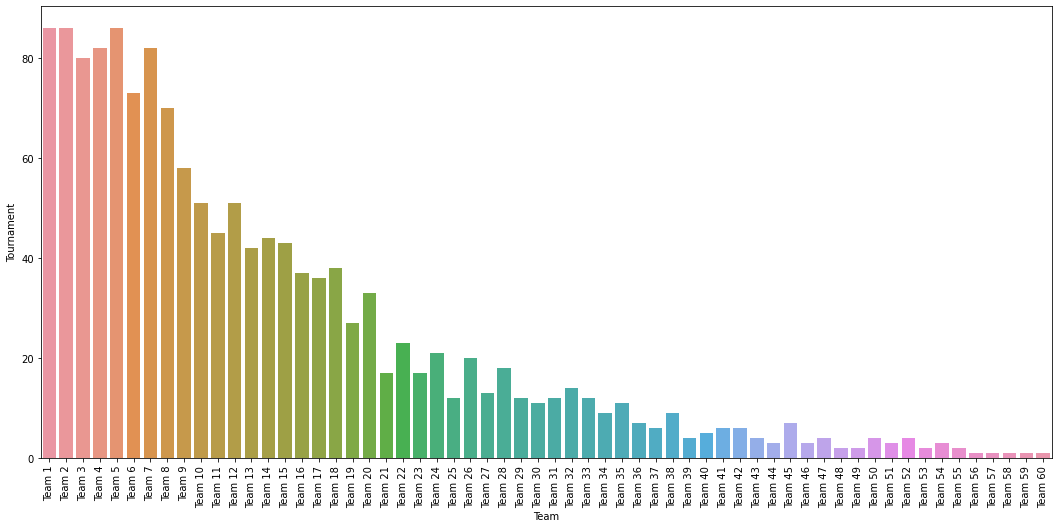

In [464]:

sns.barplot(df['Team'],df['Tournament'])   
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

we can see Team 1,2,5 played most number of tournaments.

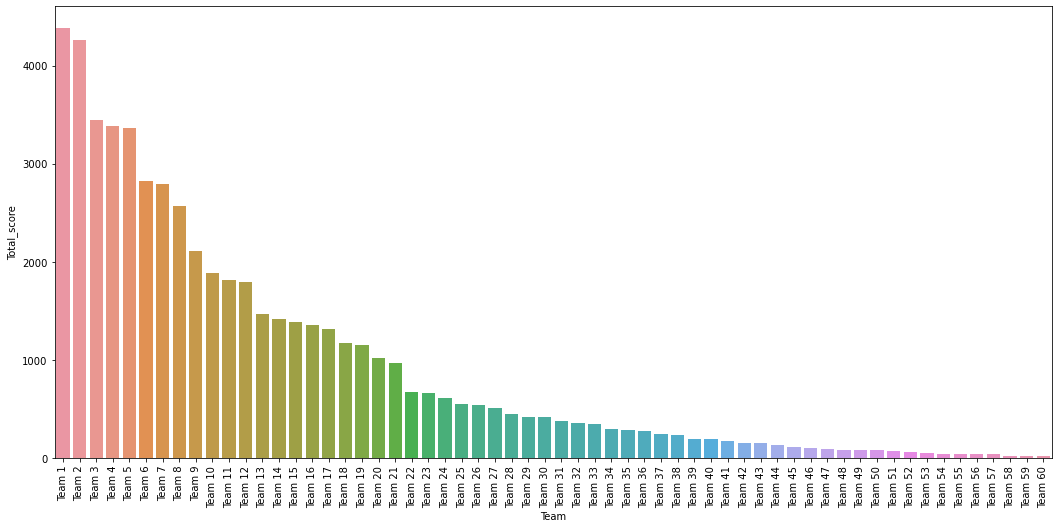

In [465]:

sns.barplot(df['Team'],df['Total_score'])   
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

There are many teams who have played less no of matches thats why there scores low,team 1 &2 are among the top scorers.

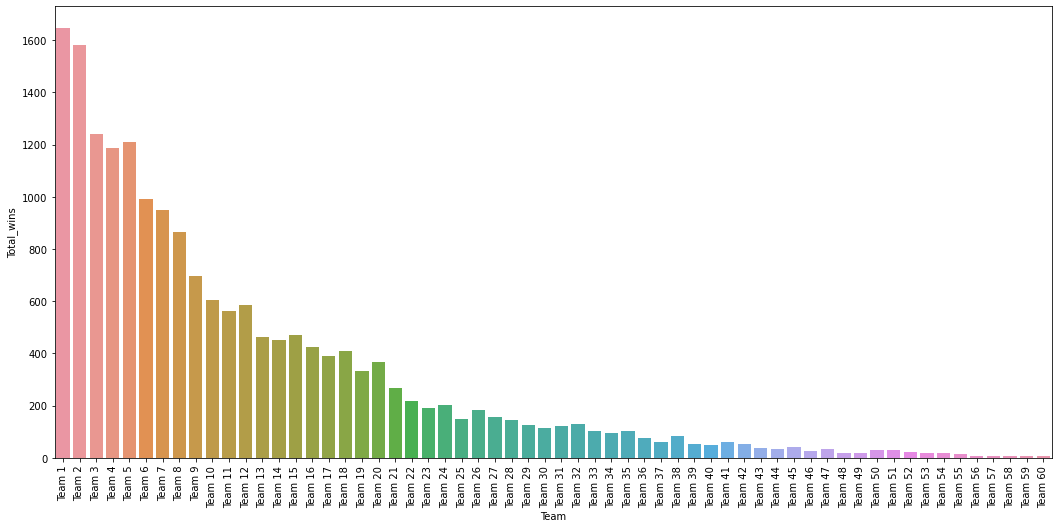

In [466]:
sns.barplot(df['Team'],df['Total_wins'])   
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

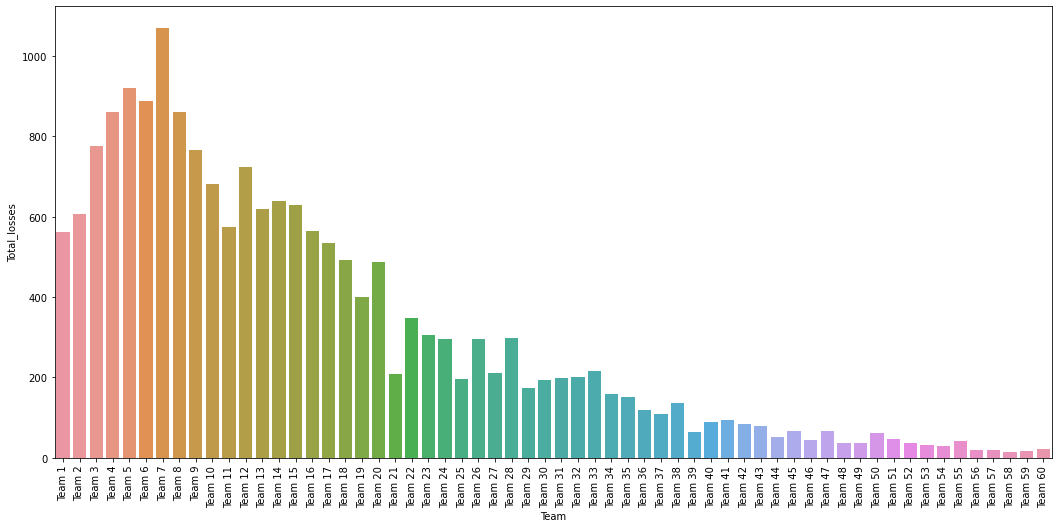

In [467]:
sns.barplot(df['Team'],df['Total_losses'])   
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

We can see team 7 lost most no of matches.

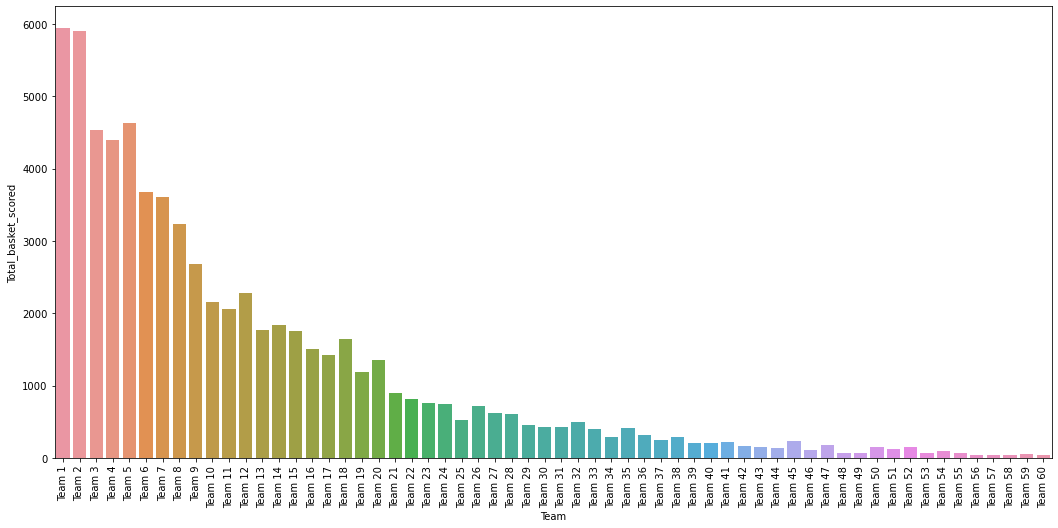

In [468]:
sns.barplot(df['Team'],df['Total_basket_scored'])   
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

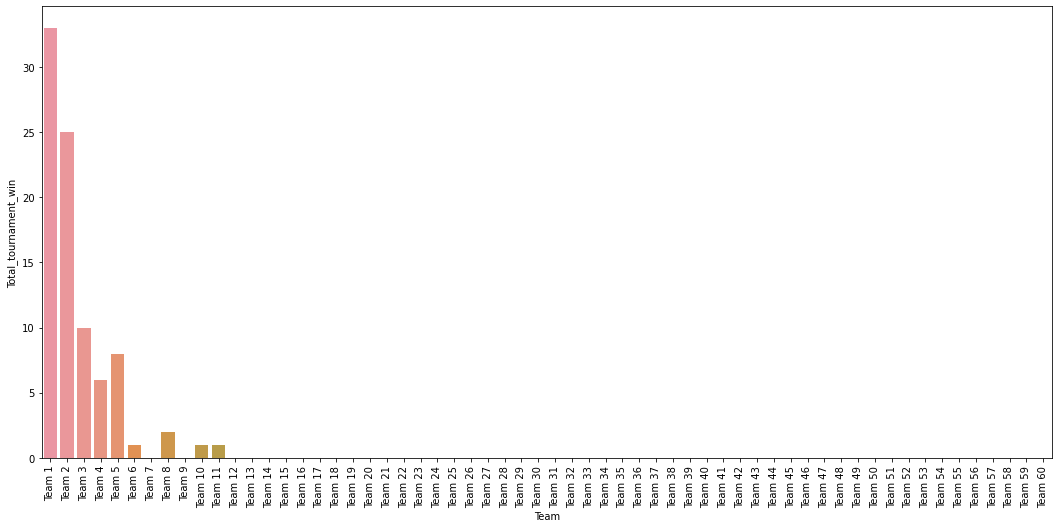

In [469]:
sns.barplot(df['Team'],df['Total_tournament_win'])   
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

Team 1 won arount 35 tournaments team 2 around 25,most of the teams havent won any tournaments yet.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 [Text(0, 0, '1929'),
  Text(1, 0, '1931'),
  Text(2, 0, '1934'),
  Text(3, 0, '1939'),
  Text(4, 0, '1932'),
  Text(5, 0, '1941'),
  Text(6, 0, '1948'),
  Text(7, 0, '1944'),
  Text(8, 0, '1935'),
  Text(9, 0, '1949'),
  Text(10, 0, '1933'),
  Text(11, 0, '1960'),
  Text(12, 0, '1951'),
  Text(13, 0, '1998'),
  Text(14, 0, '1977'),
  Text(15, 0, '1959'),
  Text(16, 0, '2004'),
  Text(17, 0, '1961'),
  Text(18, 0, '1940'),
  Text(19, 0, '1930'),
  Text(20, 0, '1963'),
  Text(21, 0, '1974'),
  Text(22, 0, '1943'),
  Text(23, 0, '1987'),
  Text(24, 0, '1991'),
  Text(25, 0, '2007'),
  Text(26, 0, '1962'),
  Text(27, 0, '1994'),
  Text(28, 0, '1978'),
  Text(29, 0, '1971'),
  Text(30, 0, '1999'),
  Text(31, 0, '2014'),
  Text(32, 0, '1990'),
  Text(33, 0, '1947'),
  Text(34, 0, '1996'),
  T

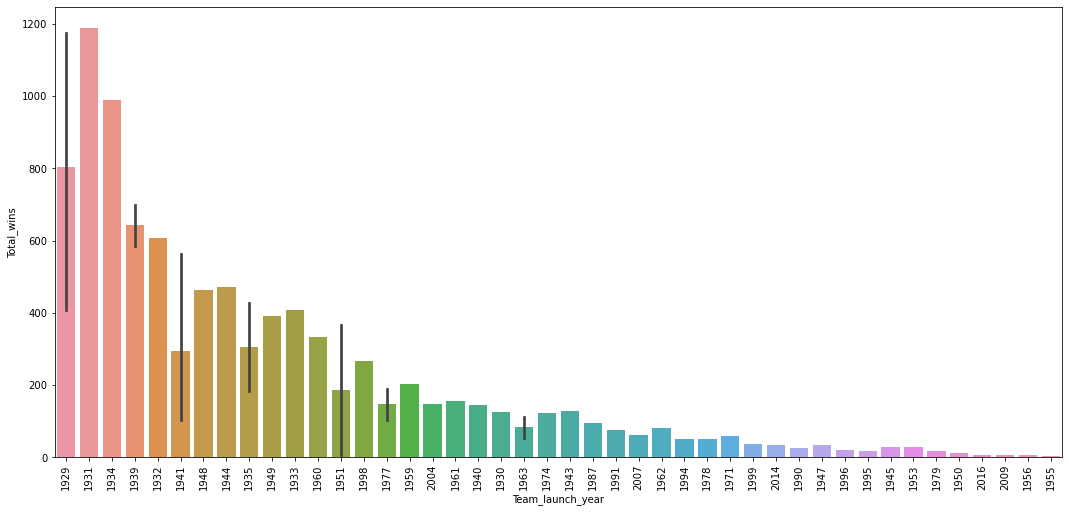

In [470]:
sns.barplot(df['Team_launch_year'],df['Total_wins'])
plt.tight_layout()
plt.xticks(rotation=90)

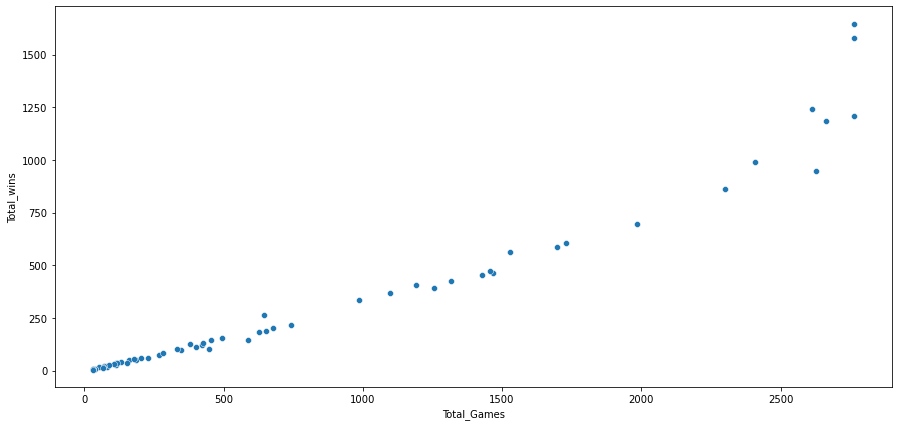

In [471]:
sns.scatterplot(df['Total_Games'],df['Total_wins'])

plt.show()

There is a linear relation between total wins and total games

In [472]:
df['winning_percentage']=(df['Total_wins']/df['Total_Games'])*100
df['winning_percentage']

0     59.630702
1     57.241130
2     47.475134
3     44.557057
4     43.772629
5     41.112957
6     36.100533
7     37.532580
8     35.146022
9     35.069444
10    36.797386
11    34.511190
12    31.582538
13    31.722689
14    32.304527
15    32.321700
16    31.075697
17    34.228188
18    33.704453
19    33.485401
20    41.176471
21    29.380054
22    28.987730
23    29.941003
24    32.236842
25    29.299363
26    31.376518
27    24.744027
28    32.894737
29    28.109453
30    29.078014
31    30.281690
32    23.214286
33    27.745665
34    30.838323
35    28.148148
36    27.192982
37    29.078014
38    32.500000
39    26.881720
40    28.921569
41    29.444444
42    24.342105
43    30.701754
44    33.076923
45    22.807018
46    29.310345
47    25.000000
48    23.750000
49    27.777778
50    32.222222
51    29.166667
52    25.000000
53    33.333333
54    19.117647
55    21.052632
56    21.052632
57    23.333333
58    23.333333
59    16.666667
Name: winning_percentage, dtype: float64

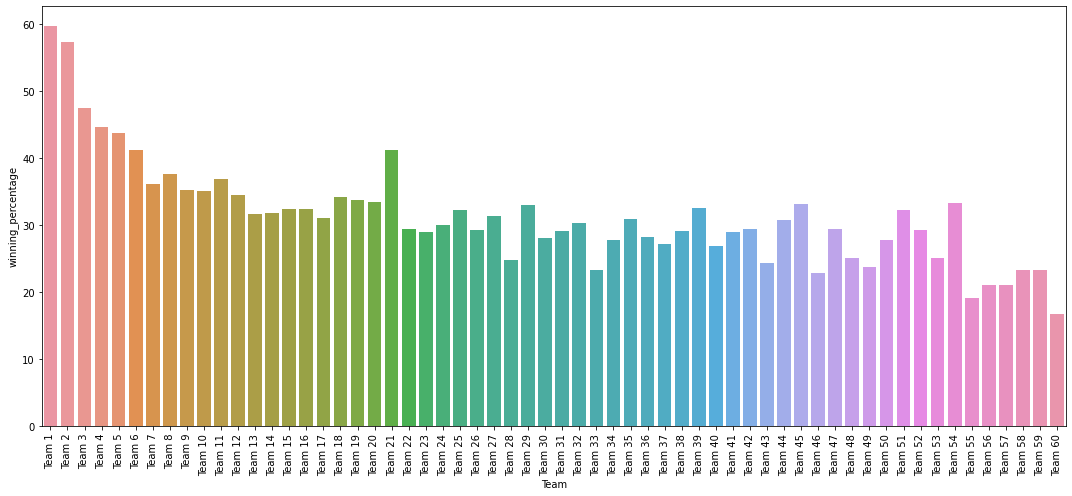

In [473]:
sns.barplot(df['Team'],df['winning_percentage'])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Winning percentage shows that Team 1 and Team 2 have their winning percentage over 55 percentage ,there are many teams in the tournament whose winning percentage is between 30 and 40.

# Multivariate Analysis

In [474]:
df.corr()

,Tournament,HighestPositionHeld,Total_score,Total_Games,Total_wins,Total_draw,Total_losses,Total_basket_scored,Total_basket_given,Total_tournament_win,Total_runnerups,winning_percentage
Tournament,1.000000,-0.708002,0.981258,0.998683,0.971749,0.989295,0.949350,0.974867,0.987781,0.589304,0.645924,0.819559
HighestPositionHeld,-0.708002,1.000000,-0.669215,-0.711065,-0.647819,-0.720248,-0.726172,-0.648672,-0.727323,-0.304307,-0.359191,-0.737288
Total_score,0.981258,-0.669215,1.000000,0.979687,0.997232,0.958090,0.878780,0.996634,0.943801,0.715014,0.764819,0.877385
Total_Games,0.998683,-0.711065,0.979687,1.000000,0.967486,0.993972,0.955925,0.969970,0.990020,0.575072,0.633101,0.813179
Total_wins,0.971749,-0.647819,0.997232,0.967486,1.000000,0.939416,0.851436,0.999312,0.925745,0.752904,0.797849,0.884278
Total_draw,0.989295,-0.720248,0.958090,0.993972,0.939416,1.000000,0.972786,0.942234,0.992479,0.503378,0.566021,0.774416
Total_losses,0.949350,-0.726172,0.878780,0.955925,0.851436,0.972786,1.000000,0.857843,0.985041,0.324025,0.391645,0.665366
Total_basket_scored,0.974867,-0.648672,0.996634,0.969970,0.999312,0.942234,0.857843,1.000000,0.931079,0.743847,0.791041,0.879124
Total_basket_given,0.987781,-0.727323,0.943801,0.990020,0.925745,0.992479,0.985041,0.931079,1.000000,0.471618,0.533448,0.757279
Total_tournament_win,0.589304,-0.304307,0.715014,0.575072,0.752904,0.503378,0.324025,0.743847,0.471618,1.000000,0.971533,0.765351


<AxesSubplot:>

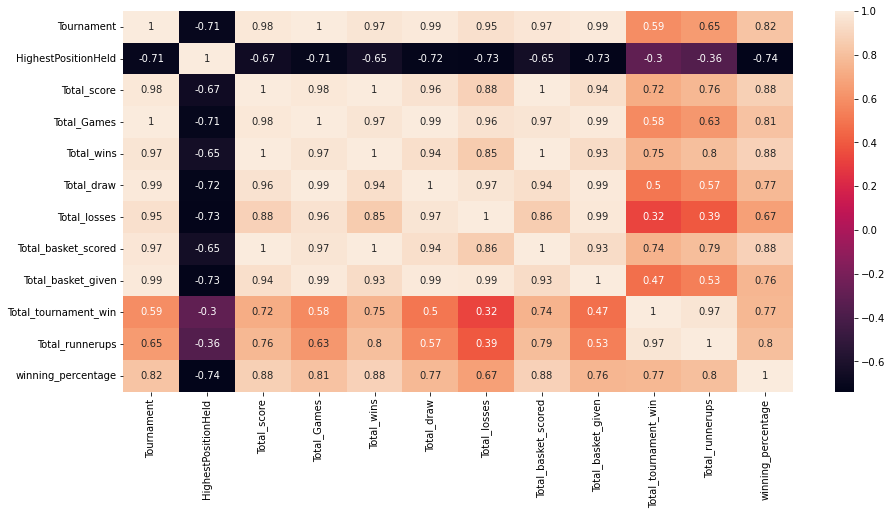

In [475]:
sns.heatmap(df.corr(),annot=True)

we can see that is very high correlation (0.97)between tournament won and total runnerup ,as the basket_scored is increasing the chance of winning the tournament is also increasing.

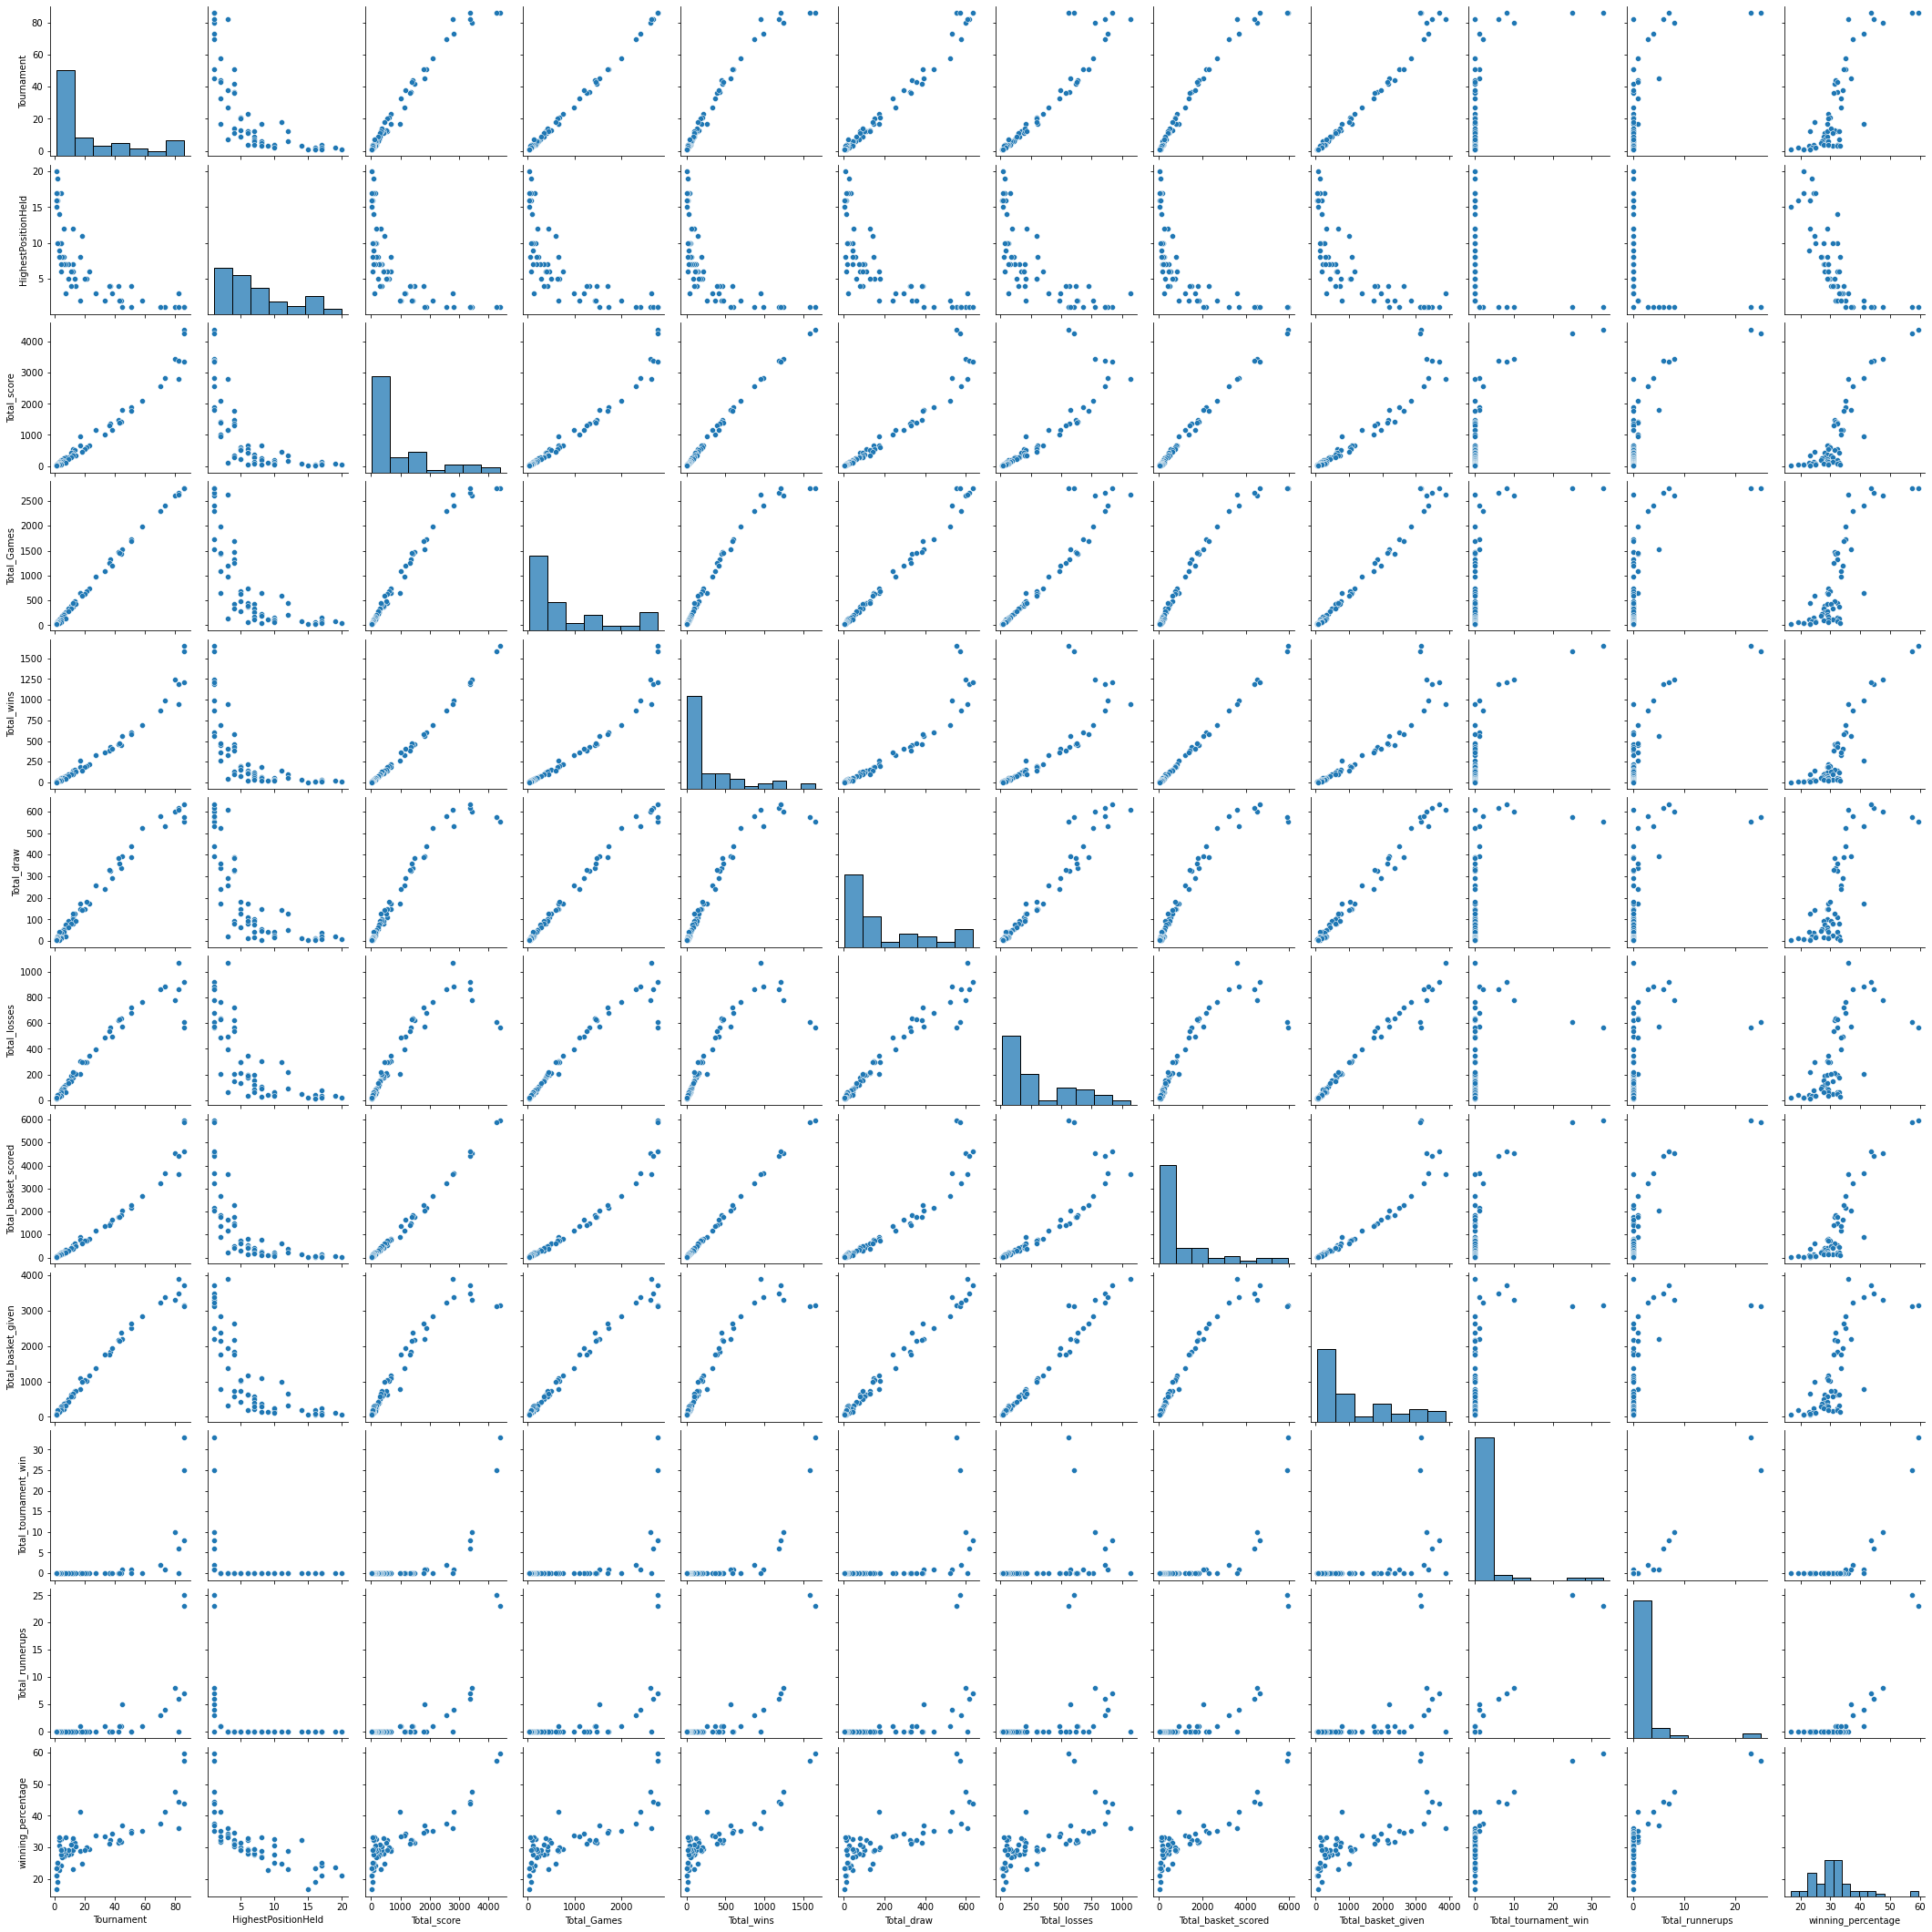

In [476]:
sns.pairplot(df)

####  deatiled performance report  - 
*  Find out the best performing team, oldest team, team with highest goals, team with lowest performance. 
* best performing team - team 1 and team 2 are the best performing teams. 
* oldest team - Team 1,Team 2,Team 3,Team 5,Team 7,Team 8,Team 14,Team 45,Team 52,Team 54.
* team with highest goals - Team 1 
* team with lowest performance - Team 60

In [479]:
#Team with highest goals 
df.loc[df["Total_basket_scored"]==df["Total_basket_scored"].max(),['Team',"Total_basket_scored"]]

,Team,Total_basket_scored
0,Team 1,5947


In [481]:
#oldest team 
y=df.loc[:,['Team_launch_year','Team']].sort_values(by=['Team_launch_year']).reset_index()


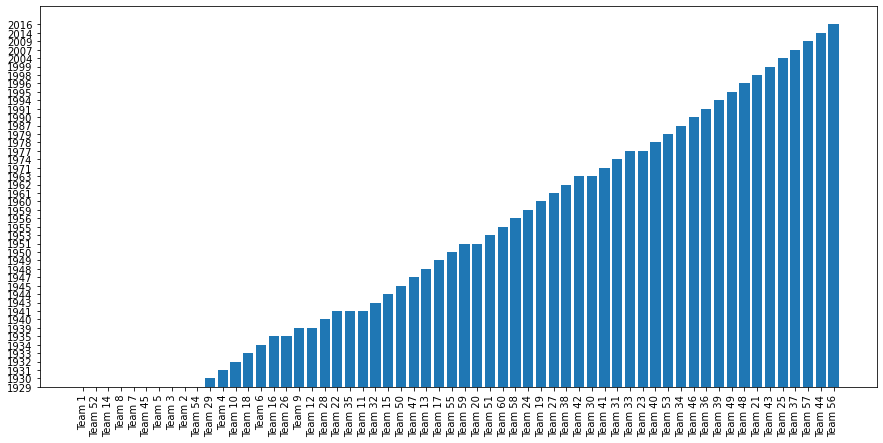

In [482]:
##oldest team
#x=df['Team'].sort()

plt.bar(x=y['Team'],height=y['Team_launch_year'])
plt.xticks(rotation=90)
plt.show()

In [483]:
#oldest team 
df.loc[df["Team_launch_year"]==df["Team_launch_year"].min(),['Team']]

,Team
0,Team 1
1,Team 2
2,Team 3
4,Team 5
6,Team 7
7,Team 8
13,Team 14
44,Team 45
51,Team 52
53,Team 54


In [484]:
##splitting the data into numerical and categorical datatype

In [485]:
df_num=df.select_dtypes(include=np.number)

In [486]:
df_cat=df.select_dtypes(include="object")

In [487]:
df_cat.columns

Index(['Team', 'Team_launch_year'], dtype='object')

In [331]:
## Encoding of categorical values. There are only 2 categorical values, out of which only 1 has been encoded. 
#We have not encoded the variable Team as it is our target variable and we have to provide best teams names to our investors.
pd.get_dummies(df['Team_launch_year'],drop_first=True).head(2)

,1930,1931,1932,1933,1934,1935,1939,1940,1941,1943,...,1994,1995,1996,1998,1999,2004,2007,2009,2014,2016
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We have performed one hot encoding but there are lot of unique values and while performing friquency encoding we find that frequency of many records matches.

In [332]:
#split the data into train test 
X=df.Team
y=df.drop("Team",axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=1)

In [333]:
##scaling of the numerical data

In [334]:
from sklearn.preprocessing import StandardScaler 
sc=StandardScaler()
    

In [335]:
cols=df_num.columns
for k in cols:
    df.loc[:,k]=sc.fit_transform(pd.DataFrame(df.loc[:,k]))
    

#### Q3. Please include any improvements or suggestions to the association management on quality, quantity, variety, velocity,veracity etc. on the data points collected by the association to perform a better data analysis in future.Submit a 200-500 words report to the management.

Quality of data - Analyst score(7/10).
Bad data can have significant business consequences for companies.
Poor-quality data is often pegged as the source of inaccurate analytics and ill-conceived business strategies.
Poor quality can lead to overflow of expenses, lost oppurtunities, wrong teams selection.
The overall quality of data is important in this regard, since the business depends on the accuracy of the data points collected.
Ensure the data has been collected from reliable source after cross verification of each data entry.
Credential of data entry operator to be verified along with the above.
Inaccurate data needs to be identified, documented and fixed to ensure that executives, data analysts and other end users are working with good information.
Quantity of data - Analyst score(8/10).
The data extracted is inadequate for peforming more exhaustive analysis.
The data needs to have more variables as well as records, 61 entries are inadequate for data exploration.
If the data collected is a sample of 61 teams out of a population, then there should be access to population to verify more.
For performing data analysis and exploration, a sample of 61 teams is adequate, however if Business and client requires Predictive Modelling then, data is highly inadequate after train-test split.
Variety of data - Analyst score(5/10).
More information would be sufficient.
For example information about Team Players, sponsors, performance of Team at home and away from home would be some useful variables.
There has to be more diversity in data types as well.
More data sources, structured, unstructured, semi-structured or raw data would be helpful.
Velocity of data - Analyst score(4/10).
The speed at which companies receive, store and manage data.
e.g., the specific number of social media posts or search queries received within a day, hour or other unit of time.
Efficient speed of data collection can be achieved if we maintain a regular record of games.
Data should be incremented for live games.
Sampling data can help in dealing with the issue like ‘velocity’.
Veracity of data - Analyst score(6/10).
It refers to inconsistencies and uncertainty in data, that is data which is available can sometimes get messy and quality and accuracy are difficult to control.
Big Data is also variable because of the multitude of data dimensions resulting from multiple disparate data types and sources.
Data in bulk could create confusion whereas less amount of data could convey half or Incomplete Information.
Not sure if Team 61 has played many games or data is missing.

#### Exploratory data analysis conclusion-
A thorough understanding of the dataset is the key to obtaining success in solving business problems using data science. After solving the EDA for the dataset,come up with your suggestions to the management for steps(( 200 to 500 words) to take to improve the business.

#### Conclusion - 
* On the basis of our analysis, we pick team 1 and team 2 as the best team. 